In [77]:
import matplotlib.pyplot as plt
from collections import OrderedDict, defaultdict
import random
import requests
import seaborn as sns
%matplotlib inline


def user_ing_raw(user_id=0):
    ing_dict = defaultdict(int)
    if user_id > 0:
        user_fc = UserFlavorCompound.objects.filter(user_id=user_id)
    else:
        user_fc = UserFlavorCompound.objects.all()
    for fc in user_fc:
        ingredient_list = IngredientFlavorCompound.objects.filter(flavor_id=fc.id)
        for ingredient in ingredient_list:
            ing_dict[ingredient.ingredient_id] += fc.score
    return sorted(ing_dict.items(), key=lambda t: t[1], reverse=True)

def user_fc_raw(user_id=0):
    fc_dict = defaultdict(int)
    if user_id > 0:
        user_fc = UserFlavorCompound.objects.filter(user_id=user_id)
    else:
        user_fc = UserFlavorCompound.objects.all()
    for fc in user_fc:
        fc_dict[fc.flavor_id] += fc.score
    return sorted(fc_dict.items(), key=lambda t: t[1], reverse=True)

def perfect_ingr(user_id):
    fc_list = set(UserFlavorCompound.objects.filter(user_id=user_id, score__gt=0).values_list('flavor_id', flat=True))
    unique_ingr_list = IngredientFlavorCompound.objects.distinct().values_list('ingredient_id', flat=True)
    full_hit_list = []
    
    for ingredient in unique_ingr_list:
        ing_fc_list = set(IngredientFlavorCompound.objects.filter(ingredient_id=ingredient).values_list('flavor_id', flat=True))
        match = set.intersection(fc_list, ing_fc_list)
        hit_percent = round((len(match) / len(ing_fc_list)), 3)
        if hit_percent >= .01:
            full_hit_list.append((ingredient, hit_percent))
    return sorted(full_hit_list, key=lambda x: x[1], reverse=True)


def popularity(most=True, item_type='ingredient'):
    sns.set()
    current_palette = sns.color_palette()
    
    if item_type == 'ingredient':
        all_ratings = user_ing_raw()
    elif item_type == 'flavor compound':
        all_ratings = user_fc_raw()
    else:
        return "Improper item_type. Options are: 'ingredient' or 'flavor compound'"
    if most:
        chosen_10 = OrderedDict(all_ratings[:10])
    else:
        chosen_10 = OrderedDict(all_ratings[:-11:-1])
    plt.barh(range(len(chosen_10)), chosen_10.values(), align='center', color = current_palette)
    plt.yticks(range(len(chosen_10)), list(chosen_10.keys()))
    plt.show()

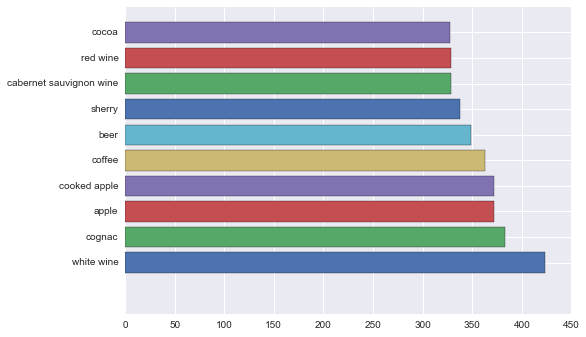

In [78]:
popularity(most=True, item_type='ingredient')